<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Train/CollectedDataSet/Test_experiments/VGG19CollectedDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
 
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input

 
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, AveragePooling2D, GlobalAveragePooling2D, Input, Flatten, Dropout
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
 
import datetime
import numpy as np
import glob
import os
import pandas as pd



from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img
from PIL import Image
from keras.preprocessing import image
import random
import cv2


2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA COLLECTION **

**Annotation**

In [ ]:
datasetpath = '/content/drive/MyDrive/collected dataset'
lists = os.listdir(datasetpath)
labels = []
file_lst = []
 
for folder in lists:
    files = os.listdir(datasetpath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])
#print(len(file_lst))
#print(len(labels))
df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(df)

                                           path   label
0                            carrot/Image_1.jpg  carrot
1                            carrot/Image_3.jpg  carrot
2                            carrot/Image_4.jpg  carrot
3                           carrot/Image_13.jpg  carrot
4                            carrot/Image_7.jpg  carrot
...                                         ...     ...
4571           pepper/téléchargement (49).jpg  pepper
4572  pepper/images - 2021-08-26T180020.735.jpg  pepper
4573  pepper/images - 2021-08-26T180042.172.jpg  pepper
4574  pepper/images - 2021-08-26T180058.456.jpg  pepper
4575  pepper/images - 2021-08-26T180157.755.jpg  pepper

[4576 rows x 2 columns]


In [ ]:
train_df, validation_df = train_test_split(df, test_size=0.3,shuffle = True, random_state=42)
print(train_df )
print(validation_df)

                                           path   label
2483                       tomato/tomato704.png  tomato
102                      carrot/images (90).jpg  carrot
1407                          tomato/09_027.png  tomato
1467                          tomato/10_041.png  tomato
1263                          tomato/04_017.png  tomato
...                                         ...     ...
4426  pepper/images - 2021-08-26T164434.360.jpg  pepper
466            carrot/téléchargement (10).jpg  carrot
3092  potato/images - 2021-08-20T172432.638.jpg  potato
3772                       pepper/Image_119.jpg  pepper
860   carrot/images - 2021-08-26T202208.418.jpg  carrot

[3203 rows x 2 columns]
                                           path   label
1644                          tomato/15_040.png  tomato
1659                          tomato/15_055.png  tomato
1510                          tomato/11_042.png  tomato
3956                       pepper/Image_491.JPG  pepper
2555                   

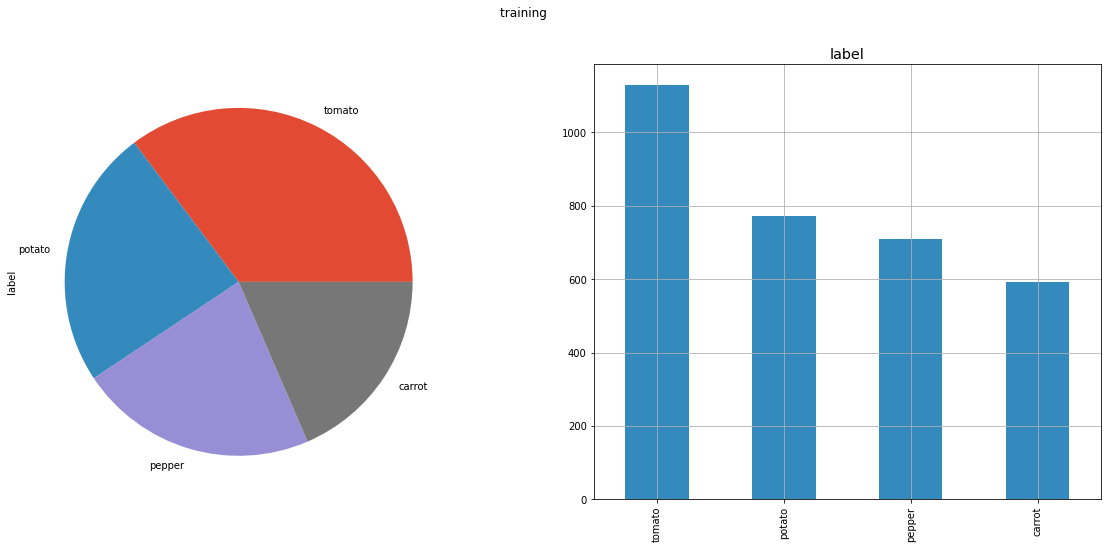

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
with plt.style.context('ggplot'):
  train_df['label'].value_counts().plot(kind='pie', title='training ',ax = axes[0],subplots=True)
  train_df['label'].value_counts().plot(kind='bar', color='C1',title='training ',ax = axes[1],subplots=True)

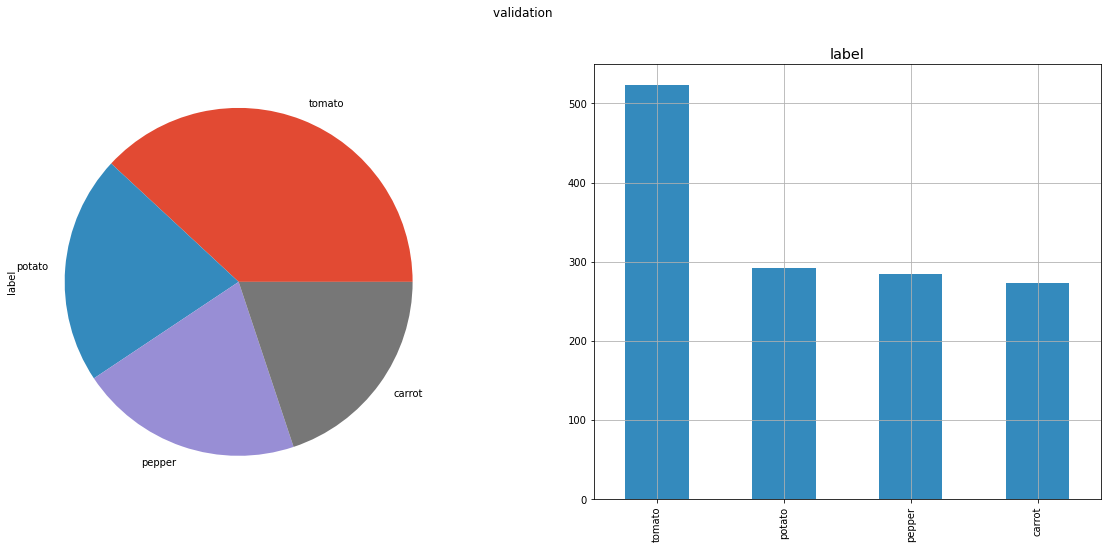

In [ ]:

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
with plt.style.context('ggplot'):
  validation_df['label'].value_counts().plot(kind='pie', title='validation ',ax = axes[0],subplots=True)
  validation_df['label'].value_counts().plot(kind='bar', color='C1',title='validation ',ax = axes[1],subplots=True)

In [ ]:
batch_size = 32
image_size=(224,224)
nb_epoch = 15

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
                  dataframe=train_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/drive/MyDrive/collected dataset',
                  target_size=image_size,
                  batch_size=batch_size
                  )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= '/content/drive/MyDrive/collected dataset',
                  target_size=image_size,
                  batch_size=batch_size
                  ) 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 3 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 3200 validated image filenames belonging to 4 classes.
Found 1371 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
print(train_generator.class_indices)


{'carrot': 0, 'pepper': 1, 'potato': 2, 'tomato': 3}


In [ ]:
class_number = 4
def build_model_graph(class_number=class_number):
  base_model = VGG19(weights='imagenet', include_top=False,input_shape = (224,224,3))
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  #x = Dense(512, activation='relu')(x)
  x = Dropout(0.3)(x)
  x = Dense(256, activation='relu')(x)
  predictions = Dense(class_number, activation='softmax')(x)
  model = Model(base_model.input, predictions)

  return model

In [ ]:
model = build_model_graph()
print(model.summary())

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

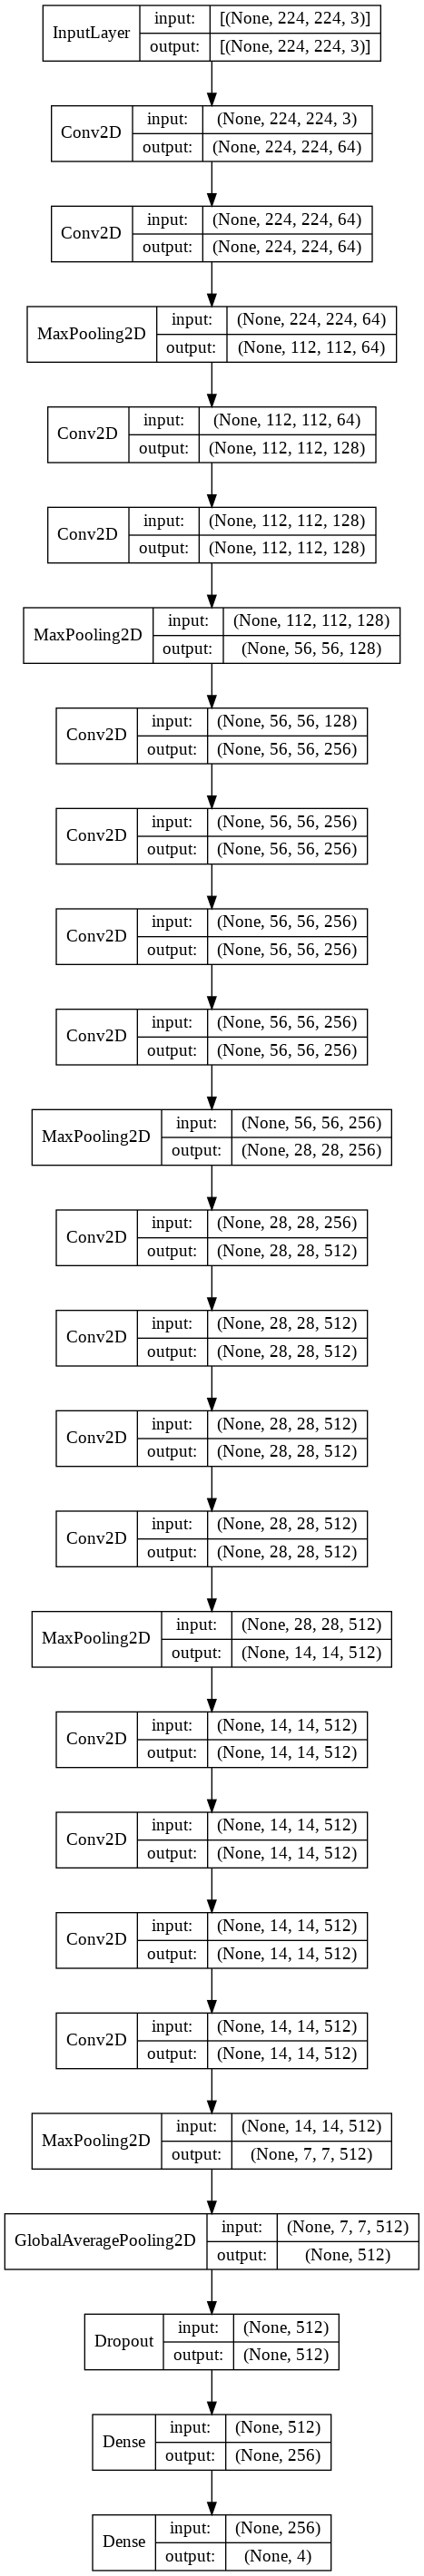

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=1e-3, momentum=0.9), 
              loss='categorical_crossentropy' ,
              metrics = ['accuracy']
              )

In [ ]:
hist=model.fit(train_generator,
          epochs=nb_epoch,
          validation_data=validation_generator
         ) 

Epoch 1/15
100/100 [==============================] - 1344s 13s/step - loss: 0.9953 - accuracy: 0.5841 - val_loss: 0.6436 - val_accuracy: 0.7535
Epoch 2/15
100/100 [==============================] - 281s 3s/step - loss: 0.6070 - accuracy: 0.7684 - val_loss: 0.3675 - val_accuracy: 0.8687
Epoch 3/15
100/100 [==============================] - 281s 3s/step - loss: 0.3595 - accuracy: 0.8766 - val_loss: 0.3679 - val_accuracy: 0.8621
Epoch 4/15
100/100 [==============================] - 277s 3s/step - loss: 0.3258 - accuracy: 0.8769 - val_loss: 0.4311 - val_accuracy: 0.8373
Epoch 5/15
100/100 [==============================] - 284s 3s/step - loss: 0.2977 - accuracy: 0.8950 - val_loss: 0.3041 - val_accuracy: 0.8964
Epoch 6/15
100/100 [==============================] - 280s 3s/step - loss: 0.2400 - accuracy: 0.9203 - val_loss: 0.4439 - val_accuracy: 0.8279
Epoch 7/15
100/100 [==============================] - 284s 3s/step - loss: 0.1759 - accuracy: 0.9381 - val_loss: 0.2297 - val_accuracy: 0.91

In [ ]:
CollectedDataset = '/content/drive/MyDrive/CollectedDataset'
os.mkdir(CollectedDataset) 

In [ ]:
VGG19Arch = '/content/drive/MyDrive/CollectedDataset/VGG19Arch'
os.mkdir(VGG19Arch) 

In [ ]:
target_dir = '/content/drive/MyDrive/CollectedDataset/VGG19Arch'
architecture_name = "VGG19Arch"
#ct = str(datetime.datetime.now())
model.save(target_dir+'/'+architecture_name+'.h5')

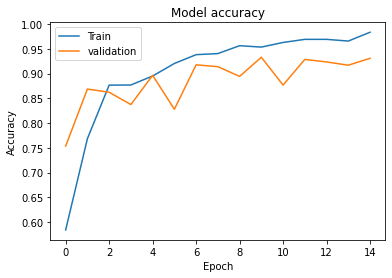

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [ ]:
hist = pd.DataFrame(hist.history)

In [ ]:
hist_csv_file = '/content/drive/MyDrive/CollectedDataset/VGG19Arch/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist.to_csv(f)